In [ ]:
import sys
import os

module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [7]:
from src.bandits import RandomizedStochasticBandit, BaseStochasticBandit
from src.agents import ExploreExploit, EpsGreedy, UCB, Thompson
from src.arms import UniformArm, GaussianArm, BernoulliArm

import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline

mpl.rcParams['figure.dpi'] = 300

In [3]:
K = 5

# prior 
alpha = 1
beta = 1

# model noise
sigma_n = 0.1

arm_factory = BernoulliArm.factory(alpha, beta)
arms = [arm_factory() for i in range(K)]
arm_means = [arm.mu for arm in arms]
bandit = BaseStochasticBandit(arms)

Multi-Armed Bandit Problem
 K=5
 mu_star = 0.924130272701961
 a_star  = 2

Bernoulli Arm mu 0.5780087963600337, 
Posterior is 1, 1

Bernoulli Arm mu 0.3378067175345512, 
Posterior is 1, 1

Bernoulli Arm mu 0.924130272701961, 
Posterior is 1, 1

Bernoulli Arm mu 0.4037361462625608, 
Posterior is 1, 1

Bernoulli Arm mu 0.36192599835771594, 
Posterior is 1, 1



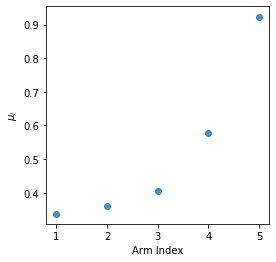

In [4]:
plt.figure(figsize=(4, 4))
sns.regplot(x = np.arange(1, K+1), y=sorted(arm_means), fit_reg=False)
plt.xlabel("Arm Index");
plt.ylabel("$\mu_i$");

In [21]:
N_seeds = 10
T = 2000

agent_classes = [Thompson, UCB, lambda x, y: ExploreExploit(x, 10, y), lambda x, y: EpsGreedy(x, 0.01, T)]
agent_names = ["Thompson", "UCB", "Explore-First", "EpsGreedy"]
agent_mats = [np.zeros((N_seeds, T+1)) for i in range(len(agent_classes))]

def run_agent(agent):
    crs = []

    while not agent.terminated():
        reward, cum_reward, a_t = agent.step()
        crs.append(cum_reward)
    
    return np.array(crs)


for i, agent_class in enumerate(agent_classes):
    for seed in range(N_seeds):
        bandit.reset(False)
        agent = agent_class(bandit, T)
        agent_mats[i][seed, :] = run_agent(agent)

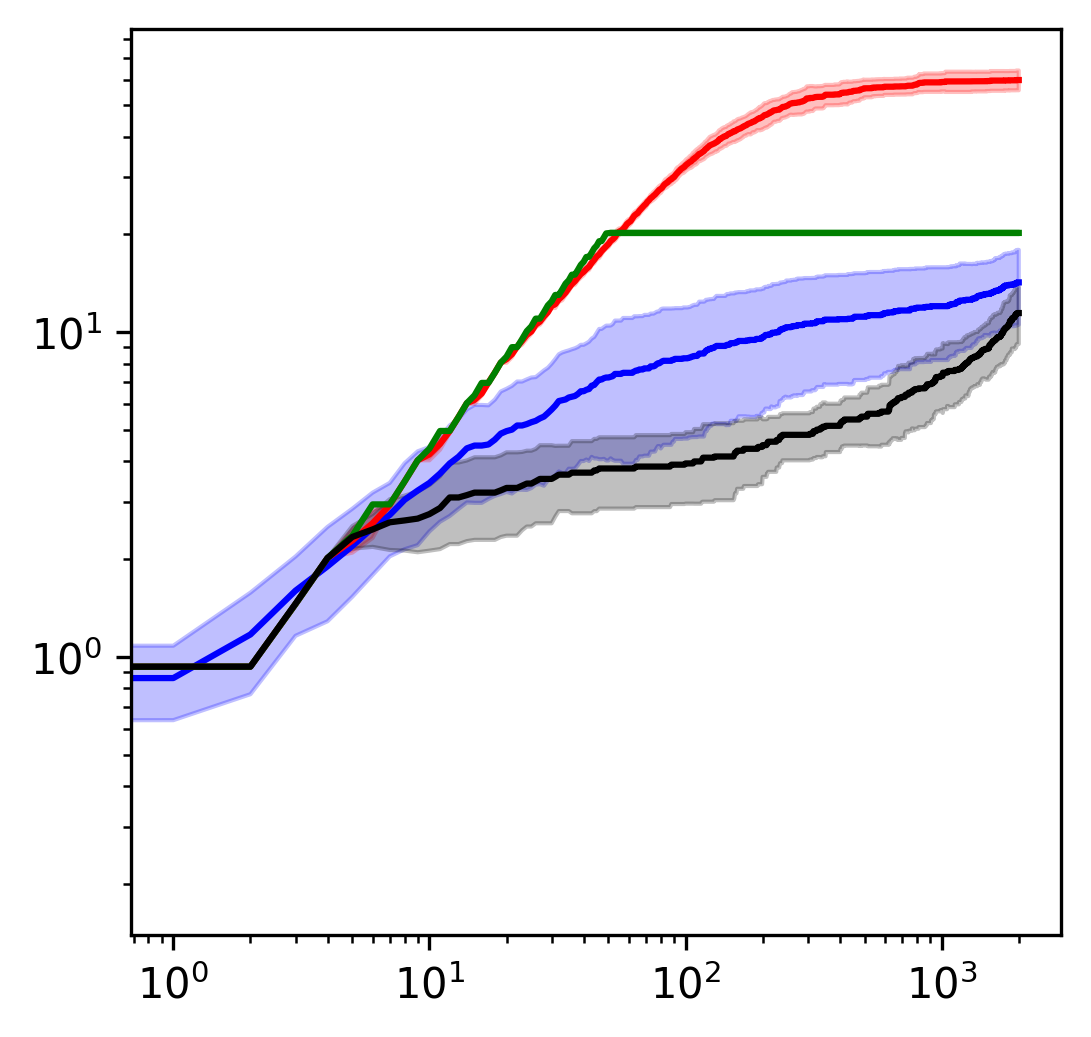

In [23]:
plt.figure(figsize=(4, 4))
xs = np.arange(0, T+1)
colors = ['b', 'r', 'g', 'k']
ax = plt.gca()

for indx, agent_mat in enumerate(agent_mats):
    r_mat = agent_mats[indx]
    mu = np.mean(r_mat, axis=0)
    std = np.std(r_mat, axis=0)
    
    plt.fill_between(xs, mu - std, mu + std, alpha=0.25, color = colors[indx])
    plt.plot(mu, color = colors[indx])
    ax.set_yscale('log')
    ax.set_xscale('log')
    